# Clustering Visualisation

**Important Note:** You must install dependencies locally on your machine in order for this notebook to work properly since it does not use the virtual environment of the project.

In [29]:
# quick and dirty hack to import from parent directory
import os, sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

# import fetcher and utils, which contains a helper method for visualisation
import utils.utils as utils
from fetcher.fetcher import Fetcher

fetcher = Fetcher()

Generating 2 clusters
0.011596875986147219


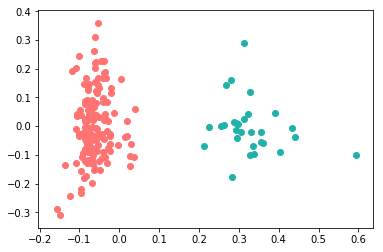

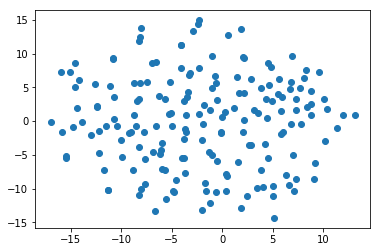

Generating 3 clusters
0.011183146993705149


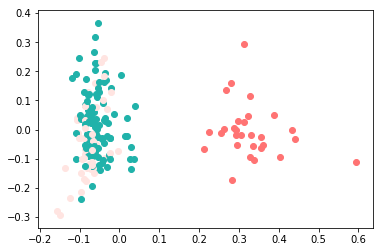

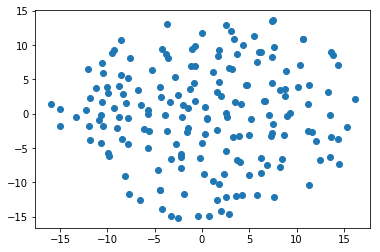

Generating 4 clusters
0.010850267894302698


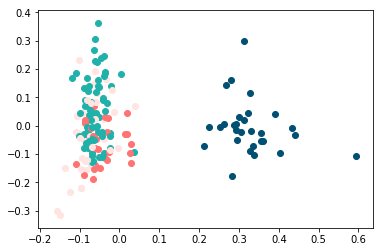

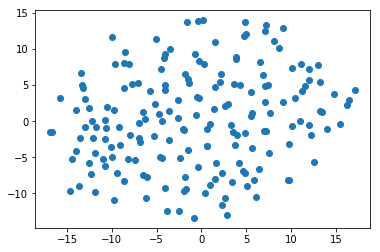

Generating 5 clusters
0.010956526913966097


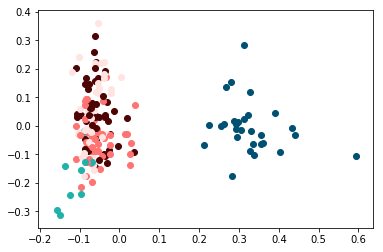

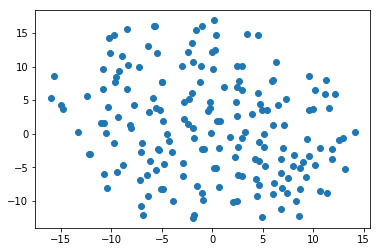

Generating 6 clusters
0.011119618247783168


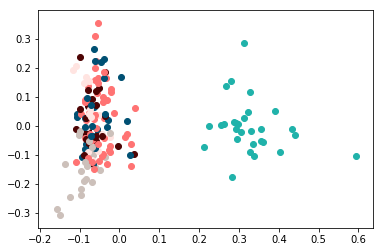

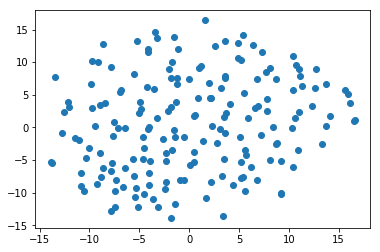

Generating 7 clusters
0.00959368565553015


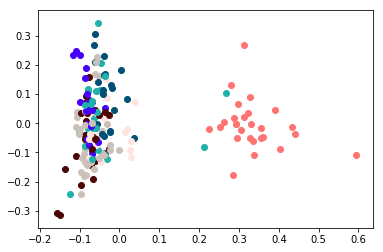

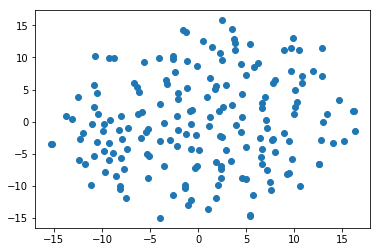

Generating 8 clusters
0.010155629035833755


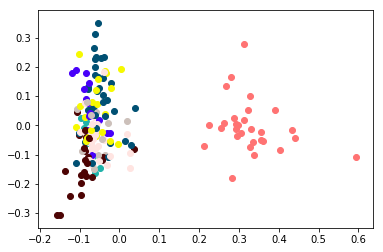

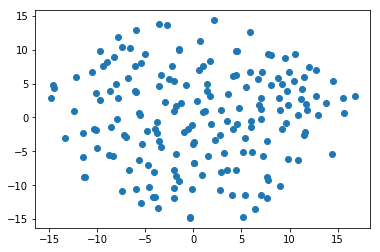

Generating 9 clusters
0.00764919711060167


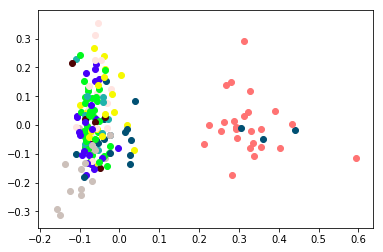

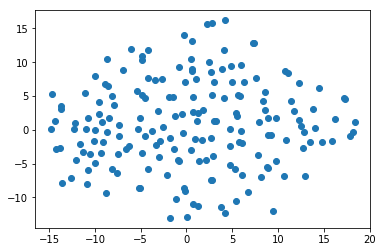

In [39]:
articles = fetcher.fetch()
        
corpus = [ x.summary for x in articles ]

# calculate the tfidf document vectors
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

MAX_CLUSTERS=9
for n_clusters in range(2,MAX_CLUSTERS+1):
    # apply kmeans clustering for classfication
    print("Generating {} clusters".format(n_clusters))
    clustering_model = KMeans(  # create k-means model with custom config
        n_clusters=n_clusters,
        max_iter=300,
        precompute_distances="auto",
        n_jobs=-1
    )

    document_labels = clustering_model.fit_predict(tfidf_matrix) # array of cluster label by document

    # evaluate the clustering quality -1 is bad, 0 is overlap, 1 is good
    print(silhouette_score(tfidf_matrix, labels=document_labels))

    visualize_tfidf_matrix(tfidf_matrix, document_labels)

As we can see from the silhouette scores and t-SNE visualisations, clustering does not appear to be a good approach.